In [22]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Task 1

In [15]:
milk = pd.read_csv('files/monthly-milk-production_1.csv', sep=';', parse_dates=['month'], dayfirst=True)
milk.index = milk.month
milk.drop('month', axis=1, inplace=True)
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='month'>

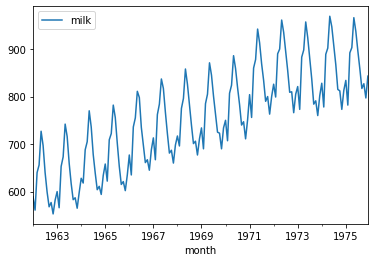

In [16]:
milk.plot()

In [17]:
import statsmodels.api as sm
round(sm.tsa.adfuller(milk)[1], 2)

0.63

In [18]:
milk['day_month'] = milk.milk / milk.index.days_in_month

<AxesSubplot:xlabel='month'>

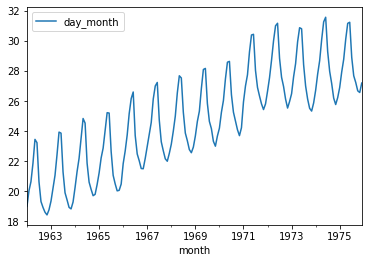

In [19]:
milk.plot(y ='day_month')

In [20]:
round(milk.day_month.sum(),2)

4166.33

# Task 2

In [23]:
from statsmodels.tsa.stattools import adfuller

In [24]:
adfuller(milk['day_month'])

(-1.1798216373266148,
 0.6822151513081394,
 12,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.570806745806692)

In [39]:
milk['day_month_dif1'] = milk['day_month']- milk['day_month'].shift(1)

In [41]:
adfuller(milk['day_month_dif1'].dropna())

(-2.759469476228912,
 0.06430054654174672,
 11,
 155,
 {'1%': -3.4732590518613002,
  '5%': -2.880374082105334,
  '10%': -2.5768120811654525},
 -1.1539973381055688)

In [32]:
milk['day_month_dif12']  = milk['day_month']- milk['day_month'].shift(12)

In [38]:
adfuller(milk['day_month_dif12'].dropna())

(-2.159486093288807,
 0.221276726588304,
 12,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -25.225679141303317)

In [42]:
milk['day_month_dif12_and_dif1'] = milk['day_month_dif12'].dropna() - milk['day_month_dif12'].shift(1)

In [43]:
adfuller(milk['day_month_dif12_and_dif1'].dropna())

(-5.481326334796927,
 2.2808455518037347e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.90513750989237)

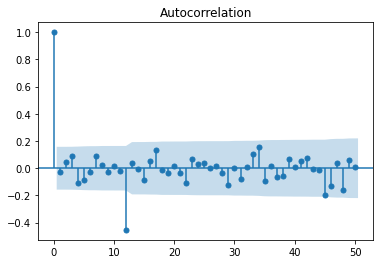

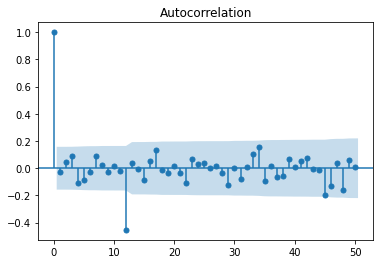

In [46]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk['day_month_dif12_and_dif1'].dropna().values.squeeze(), lags=50)

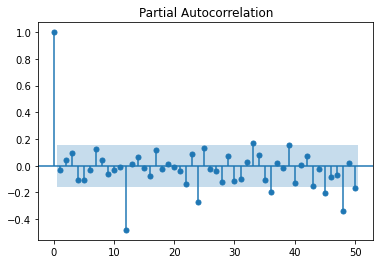

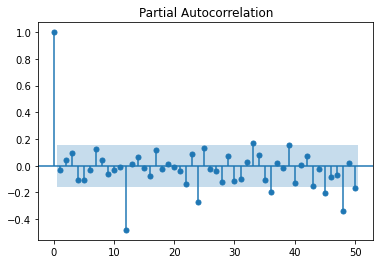

In [47]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk['day_month_dif12_and_dif1'].dropna().values.squeeze(), lags=50)